In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# List of class names
CLASS_NAMES = ['frog', 'truck', 'deer', 'automobile', 'bird', 'horse', 'ship', 'cat', 'dog',
 'airplane']

# Dictionary for encoding class names
CLASS_DICT = {CLASS_NAMES[i]: i for i in range(len(CLASS_NAMES))}

import datasets as ds_own
val_data = ds_own.cifar_val
labels = pd.read_csv('Cifar10/valLabels.csv').label
# map class names to numbers
labels = labels.map(CLASS_DICT)
from CNNpy import CNN_3_class
import torch
model1 = CNN_3_class()
model1.load_state_dict(torch.load('saved_models/model1.pt'))
model1.eval()

model2 = CNN_3_class()
model2.load_state_dict(torch.load('saved_models/model2.pt'))
model2.eval()

model3 = CNN_3_class()
model3.load_state_dict(torch.load('saved_models/model3.pt'))
model3.eval()
import torch
class ensamble():
    def __init__(self) -> None:
        self.model1 = model1
        self.model2 = model2
        self.model3 = model3

    def predict_mean(self, x):
        pred1 = np.array(self.model1.predict(x).tolist()[0])
        pred2 = np.array(self.model2.predict(x).tolist()[0])
        pred3 = np.array(self.model3.predict(x).tolist()[0])
        pred = (pred1 + pred2 + pred3) / 3
        return np.argmax(pred)
    
    def predict_max(self, x):
        pred1 = np.array(self.model1.predict(x).tolist()[0])
        pred2 = np.array(self.model2.predict(x).tolist()[0])
        pred3 = np.array(self.model3.predict(x).tolist()[0])
        pre = np.array([np.max([pred1[i], pred2[i], pred3[i]]) for i in range(len(pred1))])        
        return np.argmax(pre)


In [2]:

model = ensamble()
# import tdqm
from tqdm import tqdm
pred_mean = [np.nan] * len(val_data)
pred_max = [np.nan] * len(val_data)
pred_model1 = [np.nan] * len(val_data)
pred_model2 = [np.nan] * len(val_data)
pred_model3 = [np.nan] * len(val_data)
for i in tqdm(range(len(val_data))):
    pred_mean[i] = model.predict_mean(val_data[i][0].unsqueeze(0))
    pred_max[i] = model.predict_max(val_data[i][0].unsqueeze(0))
    pred_model1[i] = model.model1.predict_class(val_data[i][0].unsqueeze(0))
    pred_model2[i] = model.model2.predict_class(val_data[i][0].unsqueeze(0))
    pred_model3[i] = model.model3.predict_class(val_data[i][0].unsqueeze(0))


100%|██████████| 10000/10000 [10:31<00:00, 15.82it/s]


In [6]:
pred_mean = pd.read_pickle('ensamble_data/predictions_mean_model_series')
pred_max = pd.read_pickle('ensamble_data/predictions_max_model_series')
pred_model1 = pd.read_pickle('ensamble_data/predictions_model1_model_series')
pred_model2 = pd.read_pickle('ensamble_data/predictions_model2_model_series')
pred_model3 = pd.read_pickle('ensamble_data/predictions_model3_model_series')

In [9]:
# convert list of tensor to list of int
pred_model1comp = [int(pred_model1[i]) for i in range(len(pred_model1))]
pred_model2comp = [int(pred_model2[i]) for i in range(len(pred_model2))]
pred_model3comp = [int(pred_model3[i]) for i in range(len(pred_model3))]
from sklearn.metrics import accuracy_score as acc


In [7]:
def accuracy_score(pred, labels):
    return np.mean(pred == labels)


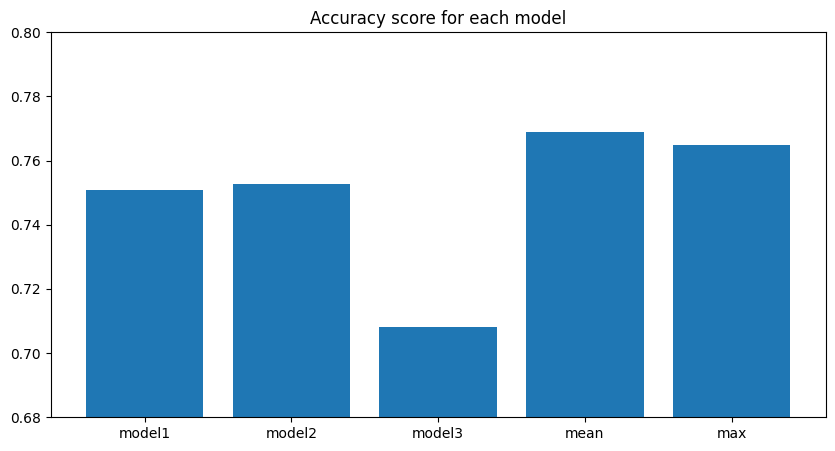

In [10]:

plt.figure(figsize=(10, 5))
plt.bar(['model1', 'model2', 'model3', 'mean', 'max'], [accuracy_score(labels, pred_model1comp), accuracy_score(labels, pred_model2comp), accuracy_score(labels, pred_model3comp), accuracy_score(labels, pred_mean), accuracy_score(labels, pred_max)])
plt.title('Accuracy score for each model')
plt.ylim(0.68, 0.8)
plt.show()


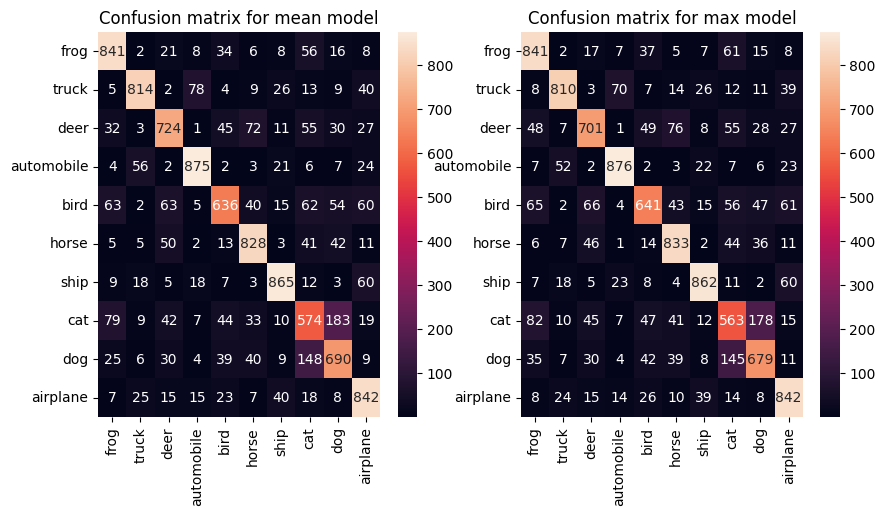

In [11]:

# import confusion_matrix
from sklearn.metrics import confusion_matrix
# show heatmap for confusion matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(labels, pred_mean), annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title('Confusion matrix for mean model')
plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(labels, pred_max), annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title('Confusion matrix for max model')
plt.show()


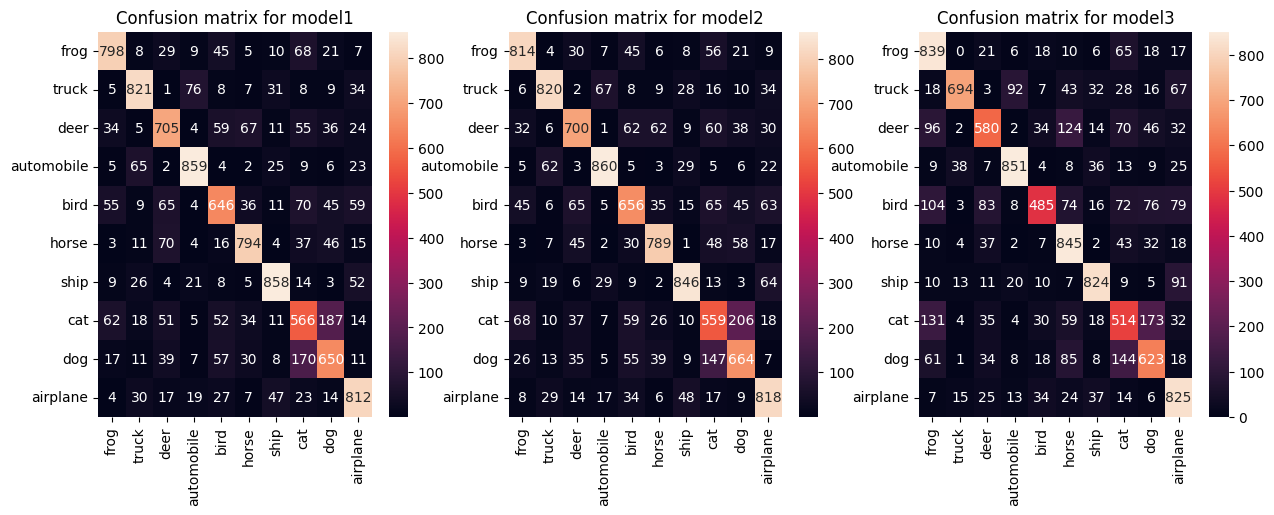

In [12]:

# show heatmap for confusion matrix for basic models
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(labels, pred_model1comp), annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title('Confusion matrix for model1')
plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(labels, pred_model2comp), annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title('Confusion matrix for model2')
plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(labels, pred_model3comp), annot=True, fmt='d', xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.title('Confusion matrix for model3')
plt.show()


In [14]:
pred_mean_ser = pd.Series(pred_mean)
pred_max_ser = pd.Series(pred_max)
pred_model1_ser = pd.Series(pred_model1)
pred_model2_ser = pd.Series(pred_model2)
pred_model3_ser = pd.Series(pred_model3)


In [15]:
# pred_mean_ser.to_pickle('ensamble_data/predictions_mean_model_series')
# pred_max_ser.to_pickle('ensamble_data/predictions_max_model_series')
# pred_model1_ser.to_pickle('ensamble_data/predictions_model1_model_series')
# pred_model2_ser.to_pickle('ensamble_data/predictions_model2_model_series')
# pred_model3_ser.to_pickle('ensamble_data/predictions_model3_model_series')

In [16]:

# show accuracy score for each class
plt.figure(figsize=(10, 5))
accuracies_mean = [np.NaN] * 10
accuracies_max = [np.NaN] * 10
accuracies_model1 = [np.NaN] * 10
accuracies_model2 = [np.NaN] * 10
accuracies_model3 = [np.NaN] * 10
for i in range(10):
    accuracies_mean[i] = np.mean(labels[labels==i]==pred_mean_ser[labels==i])
    accuracies_max[i] = np.mean(labels[labels==i]==pred_max_ser[labels==i])
    accuracies_model1[i] = np.mean(labels[labels==i]==pred_model1_ser[labels==i])
    accuracies_model2[i] = np.mean(labels[labels==i]==pred_model2_ser[labels==i])
    accuracies_model3[i] = np.mean(labels[labels==i]==pred_model3_ser[labels==i])

<Figure size 1000x500 with 0 Axes>

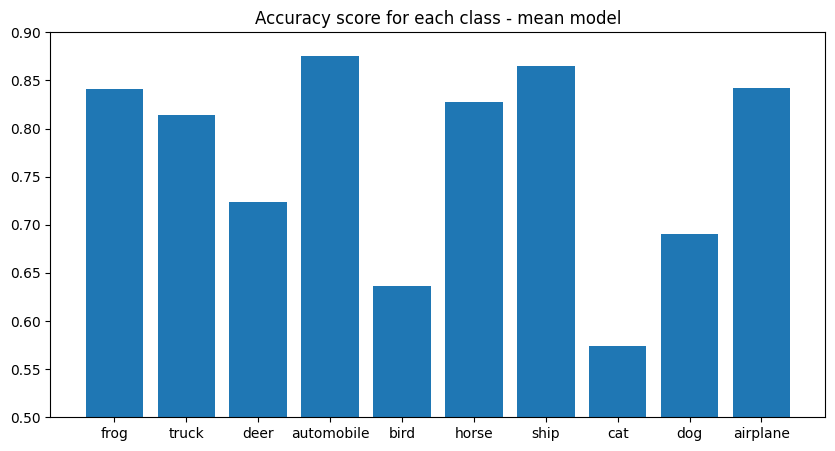

In [17]:

plt.figure(figsize=(10, 5))
plt.bar(CLASS_NAMES, accuracies_mean)
plt.title('Accuracy score for each class - mean model')
plt.ylim(0.5, 0.9)
plt.show()


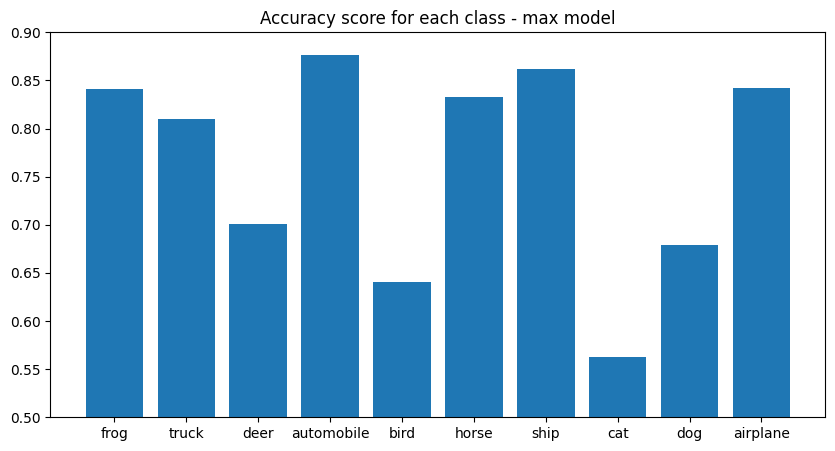

In [18]:

plt.figure(figsize=(10, 5))
plt.bar(CLASS_NAMES, accuracies_max)
plt.title('Accuracy score for each class - max model')
plt.ylim(0.5, 0.9)
plt.show()


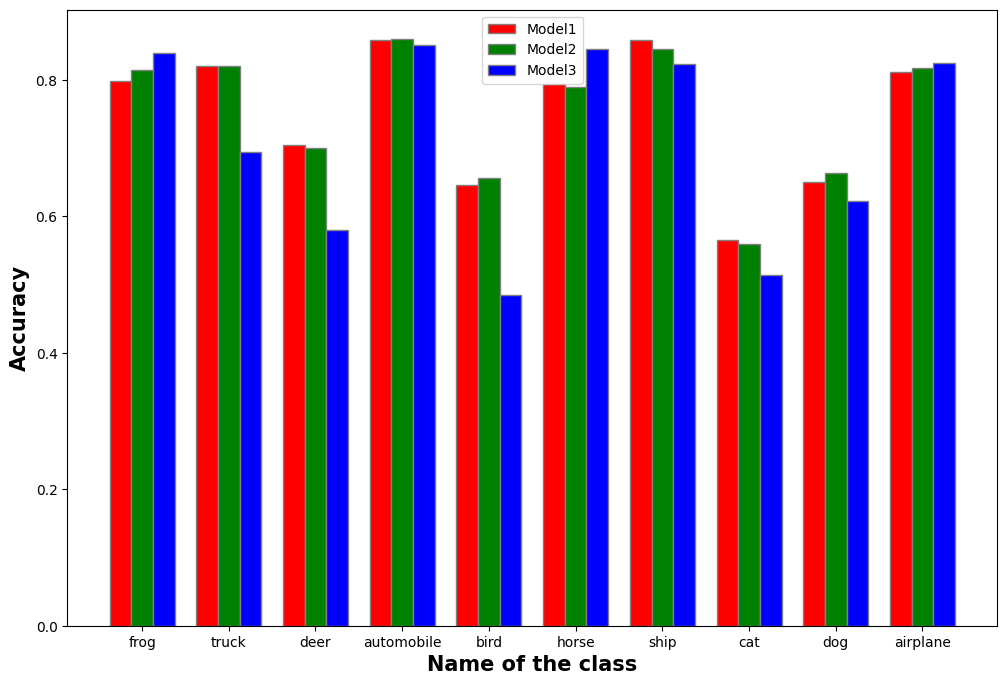

In [24]:

import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
IT = accuracies_model1
ECE = accuracies_model2
CSE = accuracies_model3
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='Model1')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='Model2')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='Model3')
 
# Adding Xticks
plt.xlabel('Name of the class', fontweight ='bold', fontsize = 15)
plt.ylabel('Accuracy', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        CLASS_NAMES)
 
plt.legend()
plt.show()